In [1]:
import pandas as pd
from prophet import Prophet

In [2]:
df_medicaid_exp = pd.read_excel('Medicaid_expenditure_2010-2024.xlsx')

In [3]:
# create the DataFrame for Medicaid Expenditure in the state of California
df_ca = df_medicaid_exp[['Year', 'Medicaid Expenditure in California ($)']].rename(
    columns={'Year': 'ds', 'Medicaid Expenditure in California ($)': 'y'})

df_ca['ds'] = pd.to_datetime(df_ca['ds'], format='%Y')

model_ca = Prophet()
model_ca.fit(df_ca)
future_ca = model_ca.make_future_dataframe(periods=10, freq='Y') # Forecast next 10 years
forecast_ca = model_ca.predict(future_ca)

21:34:50 - cmdstanpy - INFO - Chain [1] start processing
21:34:50 - cmdstanpy - INFO - Chain [1] done processing


In [4]:
# Prepare the DataFrame for the National Total expenditure
df_us = df_medicaid_exp[['Year', 'Total Medicaid Expenditure in the U.S. ($)']].rename(
    columns={'Year': 'ds', 'Total Medicaid Expenditure in the U.S. ($)': 'y'})

df_us['ds'] = pd.to_datetime(df_us['ds'], format='%Y')

model_us = Prophet()
model_us.fit(df_us)
future_us = model_us.make_future_dataframe(periods=10, freq='Y') # Forecast 5 years
forecast_us = model_us.predict(future_us)

21:34:51 - cmdstanpy - INFO - Chain [1] start processing
21:34:52 - cmdstanpy - INFO - Chain [1] done processing


California Forecast:
           ds          yhat    yhat_lower    yhat_upper
20 2029-12-31  1.851369e+11  1.757960e+11  1.939118e+11
21 2030-12-31  1.944595e+11  1.852166e+11  2.034166e+11
22 2031-12-31  2.040420e+11  1.941467e+11  2.143164e+11
23 2032-12-31  2.027886e+11  1.938545e+11  2.124558e+11
24 2033-12-31  2.118473e+11  2.021610e+11  2.218570e+11

U.S. Total Forecast:
           ds          yhat    yhat_lower    yhat_upper
20 2029-12-31  1.269503e+12  1.230048e+12  1.309682e+12
21 2030-12-31  1.303916e+12  1.256310e+12  1.353298e+12
22 2031-12-31  1.331451e+12  1.271427e+12  1.391844e+12
23 2032-12-31  1.469594e+12  1.395099e+12  1.540252e+12
24 2033-12-31  1.510931e+12  1.424887e+12  1.594056e+12


/var/folders/_5/77pml32s01b27rqdn8pjj4xh0000gp/T/ipykernel_44430/1743475364.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_ca.set_yticklabels([f'${tick/1e11:.1f}' for tick in yticks_ca])
/var/folders/_5/77pml32s01b27rqdn8pjj4xh0000gp/T/ipykernel_44430/1743475364.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_us.set_yticklabels([f'${tick/1e11:.1f}' for tick in yticks_us])


Customized forecast plots have been saved as PNG files.


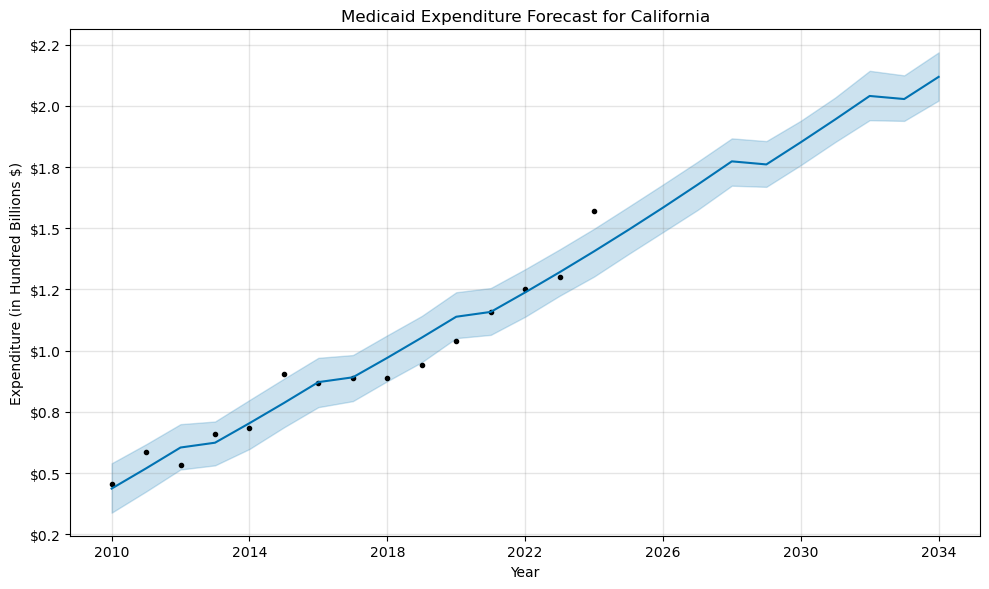

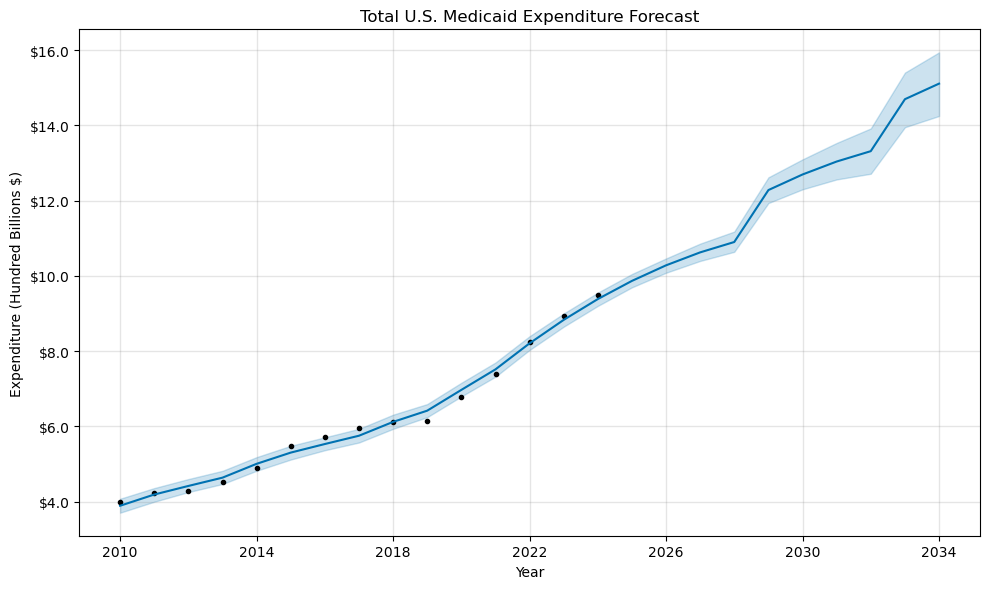

In [ ]:
# View the California forecast
print("California Forecast:")
print(forecast_ca[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

print("\nU.S. Total Forecast:")
print(forecast_us[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

fig_ca = model_ca.plot(forecast_ca)
ax_ca = fig_ca.gca()

# Customize labels and title
ax_ca.set_xlabel("Year")
ax_ca.set_ylabel("Expenditure (in Hundred Billions $)")
ax_ca.set_title("Medicaid Expenditure Forecast for California")

yticks_ca = ax_ca.get_yticks()
ax_ca.set_yticklabels([f'${tick/1e11:.1f}' for tick in yticks_ca])
fig_ca.tight_layout() # Adjust plot to prevent labels from overlapping

# Create the U.S. plot
fig_us = model_us.plot(forecast_us)
ax_us = fig_us.gca()

# Customize labels and title
ax_us.set_xlabel("Year")
ax_us.set_ylabel("Expenditure (Hundred Billions $)")
ax_us.set_title("Total U.S. Medicaid Expenditure Forecast")

yticks_us = ax_us.get_yticks()
ax_us.set_yticklabels([f'${tick/1e11:.1f}' for tick in yticks_us])
fig_us.tight_layout() # Adjust plot to prevent labels from overlapping

# Save the plots
fig_ca.savefig("california_forecast_custom.png")
fig_us.savefig("us_forecast_custom.png")

print("Customized forecast plots have been saved as PNG files.")


21:41:56 - cmdstanpy - INFO - Chain [1] start processing
21:41:56 - cmdstanpy - INFO - Chain [1] done processing
21:41:56 - cmdstanpy - INFO - Chain [1] start processing
21:41:56 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/_5/77pml32s01b27rqdn8pjj4xh0000gp/T/ipykernel_44430/2463660733.py:50: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax_ca_val.scatter(actuals_ca_val['ds'].dt.to_pydatetime(), actuals_ca_val['y'],
/var/folders/_5/77pml32s01b27rqdn8pjj4xh0000gp/T/ipykernel_44430/2463660733.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_ca_val.set_yticklabels([f'${tick/1e11:.1f}' for tick in yticks_ca_val])
/var/folders/_5/77pml32s01b27rqdn8pjj4xh0000gp/T/ipykernel_44430/2463660733.py:6


Validation forecast plots with actual data points saved as PNG files. This should work now! ✅


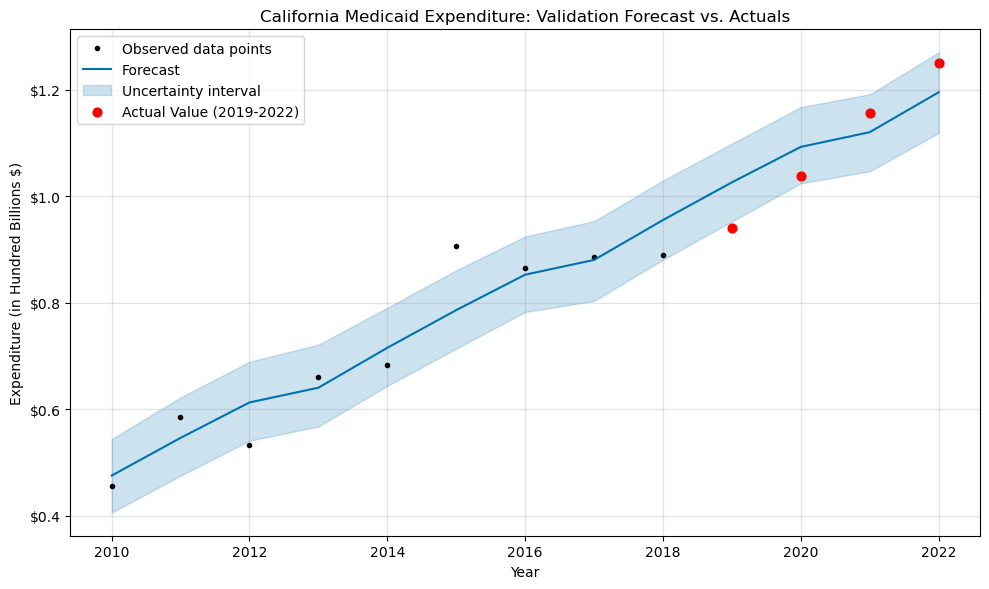

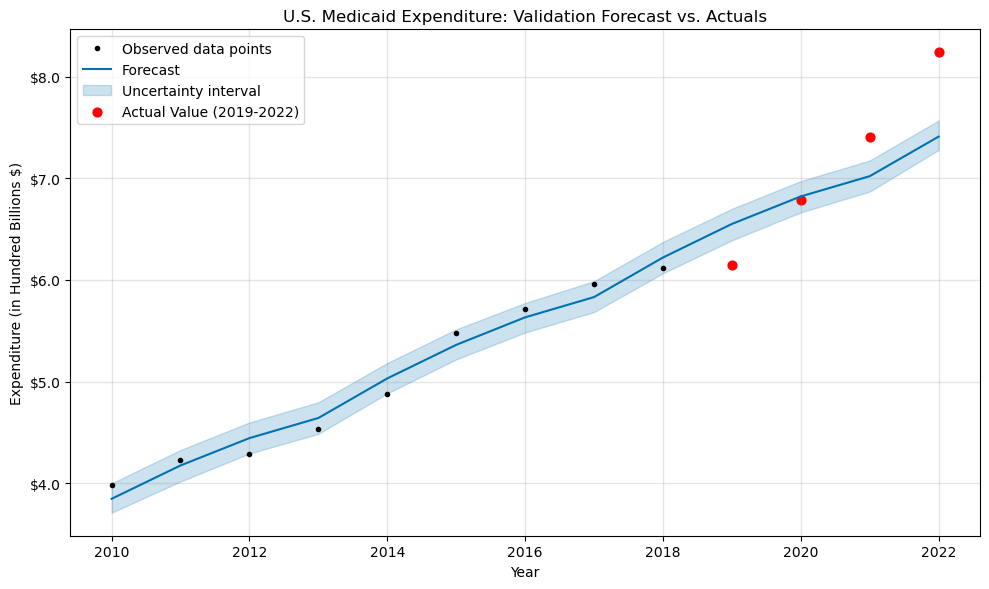

In [10]:
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation
import matplotlib.pyplot as plt
import numpy as np

# --- California Validation ---
# 1. Create the training dataset (data up to the end of 2018)
df_ca_train = df_ca[df_ca['ds'] <= '2018-12-31']

# 2. Fit a new model on the training data
model_ca_val = Prophet()
model_ca_val.fit(df_ca_train)

# 3. Create a future dataframe using 'YS' for Year-Start frequency
future_ca_val = model_ca_val.make_future_dataframe(periods=4, freq='YS')

# 4. Make the forecast
forecast_ca_val = model_ca_val.predict(future_ca_val)

# 5. Merge forecast with actual values for comparison
comp_ca = pd.merge(df_ca, forecast_ca_val[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds', how='inner')


# --- U.S. Total Validation ---
# 1. Create the training dataset
df_us_train = df_us[df_us['ds'] <= '2018-12-31']

# 2. Fit a new model
model_us_val = Prophet()
model_us_val.fit(df_us_train)

# 3. Create a future dataframe using 'YS' for Year-Start frequency
future_us_val = model_us_val.make_future_dataframe(periods=4, freq='YS')

# 4. Make the forecast
forecast_us_val = model_us_val.predict(future_us_val)

# 5. Merge forecast with actual values
comp_us = pd.merge(df_us, forecast_us_val[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds', how='inner')


# Plot California validation
fig_ca_val = model_ca_val.plot(forecast_ca_val)
ax_ca_val = fig_ca_val.gca()

# Isolate the actual data points from the validation period
actuals_ca_val = comp_ca[comp_ca['ds'] > '2018-12-31']

# Add the actuals from the validation period to the plot as red dots
ax_ca_val.scatter(actuals_ca_val['ds'].dt.to_pydatetime(), actuals_ca_val['y'],
                  c='r', s=40, label='Actual Value (2019-2022)')
ax_ca_val.set_xlabel("Year")
ax_ca_val.set_ylabel("Expenditure (in Hundred Billions $)")
ax_ca_val.set_title("California Medicaid Expenditure: Validation Forecast vs. Actuals")
yticks_ca_val = ax_ca_val.get_yticks()
ax_ca_val.set_yticklabels([f'${tick/1e11:.1f}' for tick in yticks_ca_val])
ax_ca_val.legend()
fig_ca_val.tight_layout()
fig_ca_val.savefig("california_validation_forecast.png")


# Plot U.S. validation
fig_us_val = model_us_val.plot(forecast_us_val)
ax_us_val = fig_us_val.gca()
actuals_us_val = comp_us[comp_us['ds'] > '2018-12-31']
ax_us_val.scatter(actuals_us_val['ds'].dt.to_pydatetime(), actuals_us_val['y'],
                  c='r', s=40, label='Actual Value (2019-2022)')
ax_us_val.set_xlabel("Year")
ax_us_val.set_ylabel("Expenditure (in Hundred Billions $)")
ax_us_val.set_title("U.S. Medicaid Expenditure: Validation Forecast vs. Actuals")
yticks_us_val = ax_us_val.get_yticks()
ax_us_val.set_yticklabels([f'${tick/1e11:.1f}' for tick in yticks_us_val])
ax_us_val.legend()
fig_us_val.tight_layout()
fig_us_val.savefig("us_validation_forecast.png")

print("\nValidation forecast plots with actual data points saved as PNG files. This should work now! ✅")